In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import klib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


plt.style.use('seaborn')

In [2]:
d=pd.read_csv("HotelCustomerData.csv")

In [3]:
d.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(d['NameHash'])

83590

In [5]:
d['NameHash'].nunique()

80642

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [7]:
d.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
d1=d

In [9]:
d1.drop(['NameHash'],axis=1,inplace=True) # dropping high cardinality /irrelvant varibales in the dataframe

In [10]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   DocIDHash             83590 non-null  object 
 5   AverageLeadTime       83590 non-null  int64  
 6   LodgingRevenue        83590 non-null  float64
 7   OtherRevenue          83590 non-null  float64
 8   BookingsCanceled      83590 non-null  int64  
 9   BookingsNoShowed      83590 non-null  int64  
 10  BookingsCheckedIn     83590 non-null  int64  
 11  PersonsNights         83590 non-null  int64  
 12  RoomNights            83590 non-null  int64  
 13  DaysSinceLastStay     83590 non-null  int64  
 14  DaysSinceFirstStay    83590 non-null  int64  
 15  DistributionChannel

In [11]:
d1.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [12]:
d1.nunique().sort_values(ascending=False)

ID                      83590
DocIDHash               76993
LodgingRevenue          10257
OtherRevenue             4490
DaysSinceFirstStay       1108
DaysSinceLastStay        1105
DaysSinceCreation        1095
AverageLeadTime           418
Nationality               188
Age                       105
PersonsNights              56
RoomNights                 48
BookingsCheckedIn          29
MarketSegment               7
BookingsCanceled            6
DistributionChannel         4
BookingsNoShowed            4
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

In [13]:
d1.std()

ID                      24130.498838
Age                        16.572368
DaysSinceCreation         313.390291
AverageLeadTime            87.758990
LodgingRevenue            372.851892
OtherRevenue              114.327776
BookingsCanceled            0.066770
BookingsNoShowed            0.029545
BookingsCheckedIn           0.695778
PersonsNights               4.567673
RoomNights                  2.281746
DaysSinceLastStay         347.204955
DaysSinceFirstStay        347.971089
SRHighFloor                 0.212668
SRLowFloor                  0.037546
SRAccessibleRoom            0.015848
SRMediumFloor               0.029539
SRBathtub                   0.053284
SRShower                    0.041326
SRCrib                      0.114213
SRKingSizeBed               0.477809
SRTwinBed                   0.349606
SRNearElevator              0.018299
SRAwayFromElevator          0.059101
SRNoAlcoholInMiniBar        0.010937
SRQuietRoom                 0.283837
dtype: float64

In [14]:
c=d1[d1['DaysSinceFirstStay']==-1].index

In [15]:
len(c)

19920

In [16]:
d1.drop(c,inplace=True)

In [17]:
d1[d1['DaysSinceFirstStay']==-1]

,ID,Nationality,Age,DaysSinceCreation,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom


In [18]:
import numpy as np

In [19]:
d_num=d1.select_dtypes(include=np.number)
d_num.columns

Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [20]:
#PERCENTAGE RATE

In [21]:
BookingsCanceled=d1['BookingsCanceled'].sum()
BookingsNoShowed=d1['BookingsNoShowed'].sum()
BookingsCheckedIn=d1['BookingsCheckedIn'].sum()


In [22]:
Total_Bookings=d1[['BookingsCanceled','BookingsNoShowed','BookingsCheckedIn']].sum(axis=1)

In [23]:
 tb=Total_Bookings.sum()

In [24]:
print(BookingsCanceled,BookingsNoShowed,BookingsCheckedIn)

167 53 66422


In [25]:
y=[BookingsCanceled,BookingsNoShowed,BookingsCheckedIn]
x=['BookingsCanceled','BookingsNoShowed','BookingsCheckedIn']
per=[round(BookingsCanceled/tb,4)*100,round(BookingsNoShowed/tb,4)*100,round(BookingsCheckedIn/tb,4)*100]

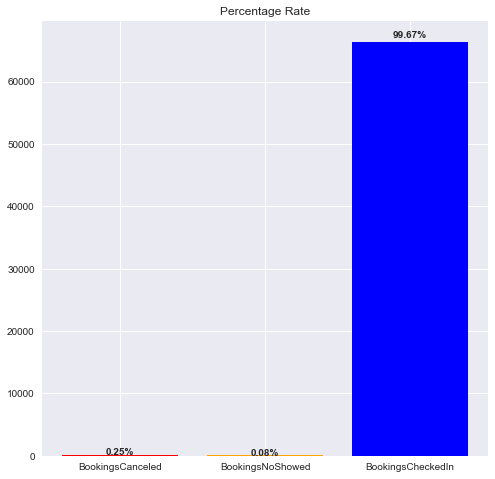

In [26]:
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(x,y, color = colors_list)
plt.title('Percentage Rate')
  
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(per[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [27]:
print('confirmation rate  ',(d1['BookingsCheckedIn'].sum()/Total_Bookings.sum())*100)

confirmation rate   99.66987785480627


In [28]:
#confirmation rate - high

In [29]:
print('Percentage rate for BookingsNoShowed',(d1['BookingsNoShowed'].sum()/Total_Bookings.sum())*100)

Percentage rate for BookingsNoShowed 0.07952942588757841


In [30]:
# less than 1 %

In [31]:
print('Percentage rate for BookingsCanceled',(d1['BookingsCanceled'].sum()/Total_Bookings.sum())*100)

Percentage rate for BookingsCanceled 0.25059271930614324


In [32]:
# less than 1 %

In [33]:
(((d1.groupby('MarketSegment')['BookingsCanceled'].sum())/Total_Bookings.sum())*100).sort_values(ascending=False)

MarketSegment
Corporate                0.147054
Direct                   0.036013
Aviation                 0.028511
Complementary            0.028511
Travel Agent/Operator    0.004502
Groups                   0.003001
Other                    0.003001
Name: BookingsCanceled, dtype: float64

In [34]:
#Corporate customers canceled more than direct customers

In [35]:
d1.groupby('MarketSegment')['BookingsCheckedIn'].sum()

MarketSegment
Aviation                   359
Complementary              580
Corporate                 3123
Direct                    8658
Groups                    8018
Other                    36233
Travel Agent/Operator     9451
Name: BookingsCheckedIn, dtype: int64

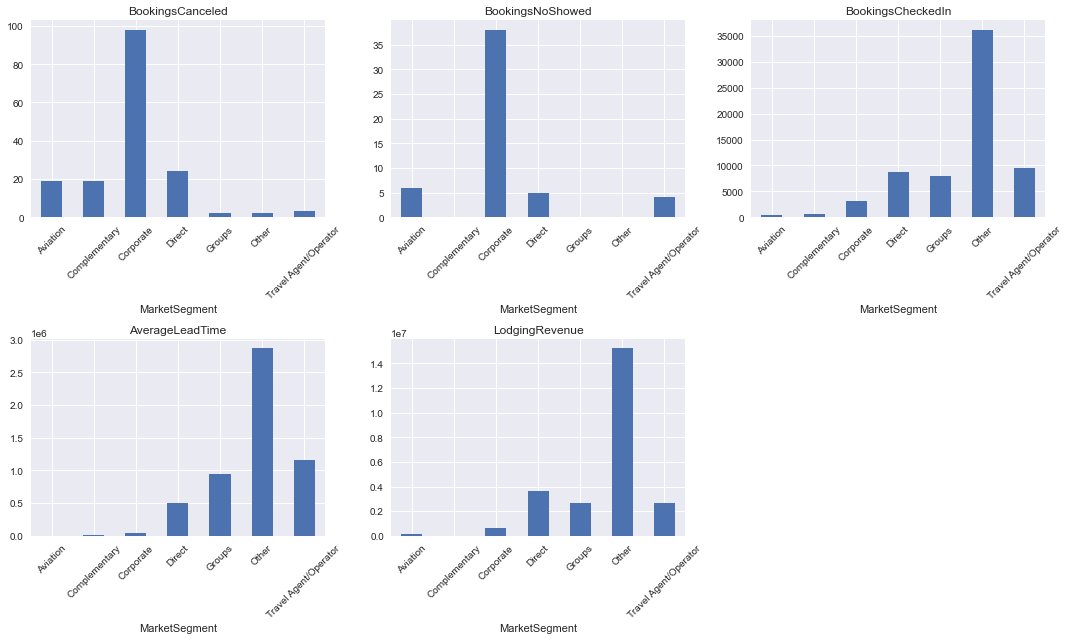

In [36]:
row  =2
col =3
count=1
plt.figure(figsize=(15,9))
for i in d1[['BookingsCanceled','BookingsNoShowed','BookingsCheckedIn','AverageLeadTime','LodgingRevenue']]:
    plt.subplot(row,col,count)
    (d1.groupby('MarketSegment')[i].sum()).plot.bar(stacked=True)
    plt.title(i)
    plt.xticks(rotation=45)
    count=count+1
plt.tight_layout()
plt.show()

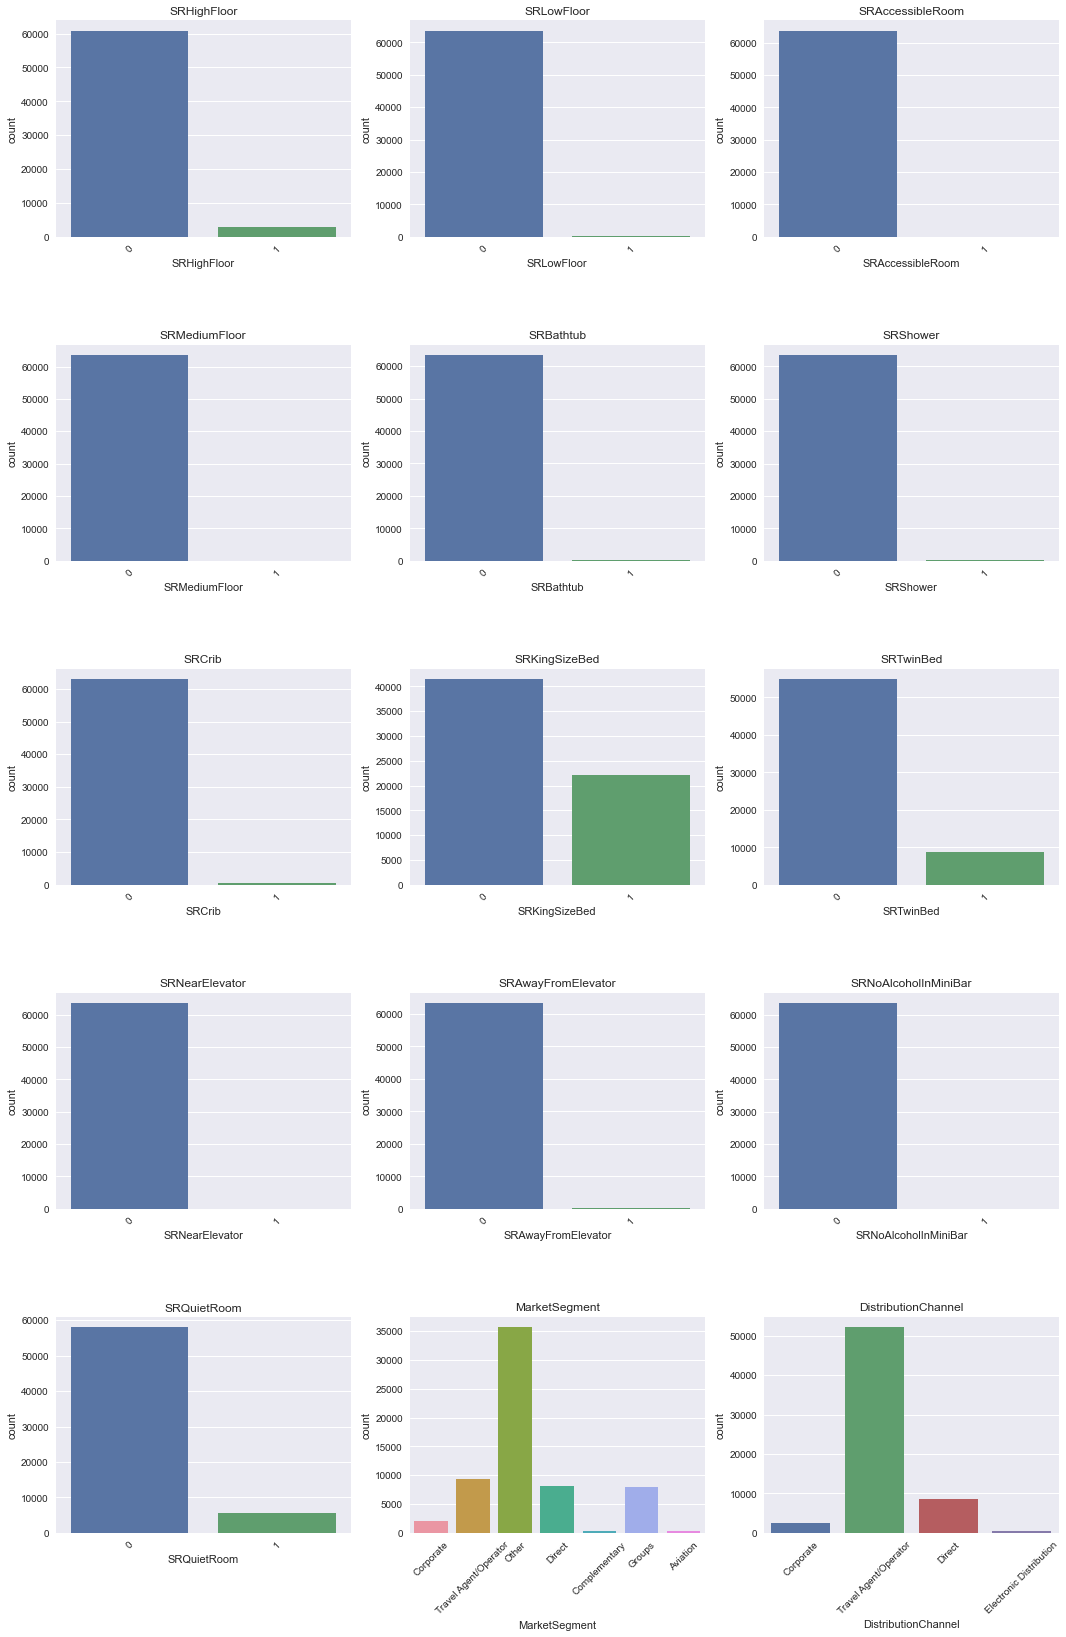

In [37]:
row  =8
col =3
count=1
plt.figure(figsize=(15,35))
for i in ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar','SRQuietRoom','MarketSegment','DistributionChannel']:
    plt.subplot(row,col,count)
    sns.countplot(d[i])
    plt.title(i)
    plt.xticks(rotation=45)
    count=count+1
plt.tight_layout()
plt.show()

In [38]:
l=d.groupby('MarketSegment')['LodgingRevenue'].sum().index
l

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Other',
       'Travel Agent/Operator'],
      dtype='object', name='MarketSegment')

<Figure size 1080x720 with 0 Axes>

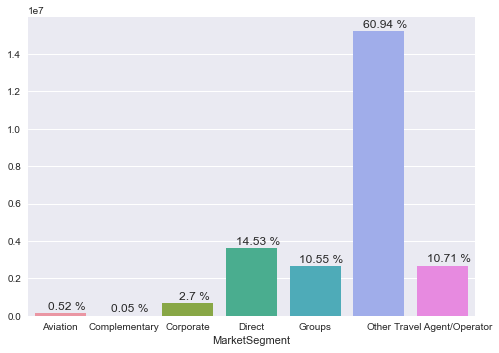

In [39]:
plt.figure(figsize=(15,10))
fig,ax=plt.subplots()
ax=sns.barplot(x=(d.groupby('MarketSegment')['LodgingRevenue'].sum()).index,
            y=(d.groupby('MarketSegment')['LodgingRevenue'].sum()).values)
for p in ax.patches:
    total=round(p.get_height()/d['LodgingRevenue'].sum()*100,2)
    x=p.get_x()+0.5
    y=p.get_height()+200000
    ax.annotate(str(total)+' %',(x,y),fontsize=12,ha='center',rotation=0)
plt.show()

In [40]:
import datetime
from datetime import timedelta

In [41]:
from dateutil import parser
def month(x):
    y=(parser.parse("Dec 31 2018")-timedelta(days=x)).month
    return y

In [42]:
from dateutil import parser
def date(x):
    y=(parser.parse("Dec 31 2018")-timedelta(days=x)).strftime("%A")
    return y

In [43]:
date(10)

'Friday'

In [44]:
count=(d['DaysSinceLastStay'].apply(month)).value_counts()


Text(0, 0.5, 'count of customers')

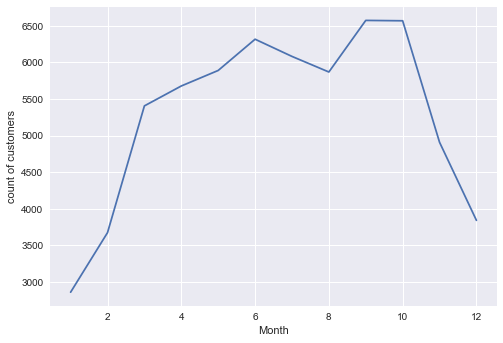

In [45]:
sns.lineplot(count.index,count.values)
plt.xlabel('Month')
plt.ylabel('count of customers')

In [46]:
# Most of the customers visited in April to October month. Maximum in September and October

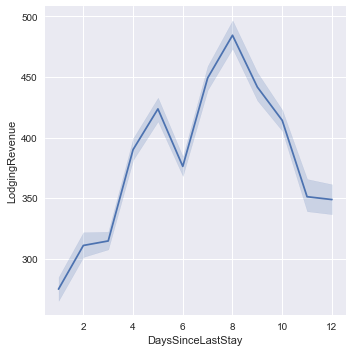

In [47]:
sns.relplot(data=d,x=d['DaysSinceLastStay'].apply(month), y='LodgingRevenue', kind="line")

In [48]:
#Highest revenue  -- August month

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='count'>

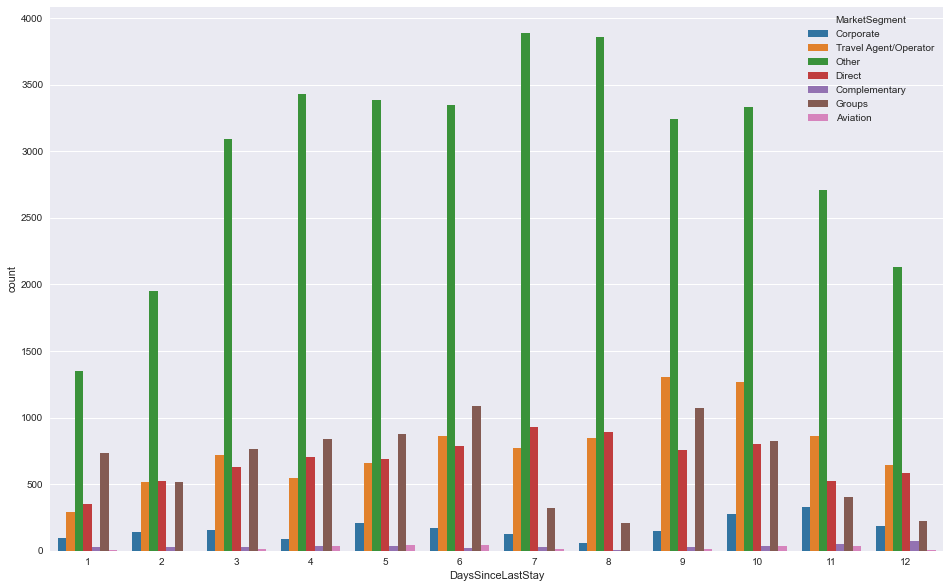

In [49]:
plt_1=plt.figure(figsize=(16,10))
sns.countplot(d['DaysSinceLastStay'].apply(month),hue=d['MarketSegment'],palette="tab10")

In [50]:
def year(x):
    y=(parser.parse("Dec 31 2018")-timedelta(days=x)).year
    return y

<AxesSubplot:xlabel='DaysSinceLastStay', ylabel='count'>

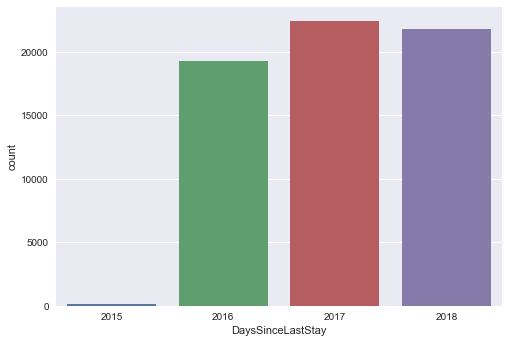

In [51]:
sns.countplot(d['DaysSinceLastStay'].apply(year))

In [52]:
d['month']=d['DaysSinceLastStay'].apply(month)
d['year']=d['DaysSinceLastStay'].apply(year)
d['Day']=d['DaysSinceLastStay'].apply(date)

<AxesSubplot:xlabel='month', ylabel='count'>

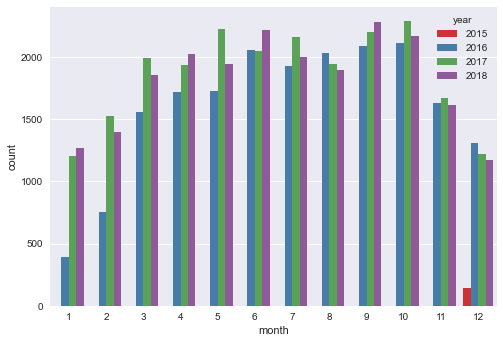

In [53]:
sns.countplot(d['month'],hue=d['year'],palette='Set1')

In [54]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63670 entries, 0 to 83588
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    63670 non-null  int64  
 1   Nationality           63670 non-null  object 
 2   Age                   60740 non-null  float64
 3   DaysSinceCreation     63670 non-null  int64  
 4   DocIDHash             63670 non-null  object 
 5   AverageLeadTime       63670 non-null  int64  
 6   LodgingRevenue        63670 non-null  float64
 7   OtherRevenue          63670 non-null  float64
 8   BookingsCanceled      63670 non-null  int64  
 9   BookingsNoShowed      63670 non-null  int64  
 10  BookingsCheckedIn     63670 non-null  int64  
 11  PersonsNights         63670 non-null  int64  
 12  RoomNights            63670 non-null  int64  
 13  DaysSinceLastStay     63670 non-null  int64  
 14  DaysSinceFirstStay    63670 non-null  int64  
 15  DistributionChannel

In [55]:
d

,ID,Nationality,Age,DaysSinceCreation,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,month,year,Day
0,1,PRT,51.0,150,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,8,2018,Thursday
1,2,PRT,NaN,1095,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,12,2015,Sunday
3,4,FRA,60.0,1095,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,12,2015,Sunday
5,6,JPN,54.0,1095,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,...,0,0,0,0,0,0,0,12,2015,Wednesday
7,8,FRA,32.0,1095,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,...,0,1,0,0,0,0,0,12,2015,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83580,83581,DEU,48.0,0,0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...,20,176.0,147.0,0,0,...,0,0,0,0,0,0,0,12,2018,Saturday
83582,83583,FRA,49.0,0,0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...,91,143.0,2.0,0,0,...,0,1,0,0,0,0,0,12,2018,Sunday
83584,83585,ITA,52.0,0,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,0,...,0,0,0,0,0,0,0,12,2018,Thursday
83586,83587,IRL,47.0,0,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,0,...,0,1,0,0,0,0,0,12,2018,Friday


Text(0.5, 1.0, 'Percentage of Arrival')

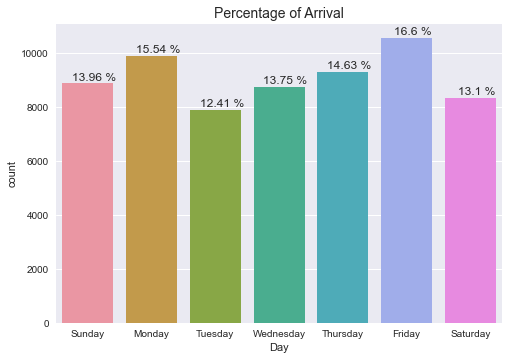

In [56]:
fig,ax=plt.subplots()
ax=sns.countplot(d['Day'],order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
for p in ax.patches:
    percentage=str(round((p.get_height()/d['Day'].count())*100,2))+' %'
    x=p.get_x()+0.5
    y=p.get_height()+120
    ax.annotate(percentage,(x,y),fontsize=12,ha='center')
ax.set_title('Percentage of Arrival',fontsize=14)

In [57]:
#Missing value treatment:
d1.isnull().sum()/len(d1)*100

ID                      0.000000
Nationality             0.000000
Age                     4.601853
DaysSinceCreation       0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoom             0.000000
month     

In [58]:
d1['Age'].fillna(d1['Age'].mode()[0],inplace=True)

In [59]:
d1['Age'].isnull().sum()

0

In [60]:
d_num=d[['Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay']]

In [61]:
d1.groupby('MarketSegment')['AverageLeadTime'].median()

MarketSegment
Aviation                  4.0
Complementary             5.0
Corporate                11.0
Direct                   33.0
Groups                   86.0
Other                    57.0
Travel Agent/Operator    91.0
Name: AverageLeadTime, dtype: float64

In [62]:
# travel Agent has high average lead time -  with median 91
#lower value - Aviation

In [63]:
d1.groupby('DistributionChannel')['AverageLeadTime'].median()

DistributionChannel
Corporate                  11.0
Direct                     30.0
Electronic Distribution    13.0
Travel Agent/Operator      66.0
Name: AverageLeadTime, dtype: float64

In [64]:
# travel Agent has high average lead time -  with median 66
# lower value - Corporate - 11

In [65]:
# Pie chart
labels = list(d1['MarketSegment'].unique())
sizes = list((d1['MarketSegment'].value_counts(normalize=True)*100).values.round(2))


In [66]:
print(labels)
print(sizes)

['Corporate', 'Travel Agent/Operator', 'Other', 'Direct', 'Complementary', 'Groups', 'Aviation']
[56.1, 14.58, 12.85, 12.35, 3.11, 0.63, 0.38]


<Figure size 720x720 with 0 Axes>

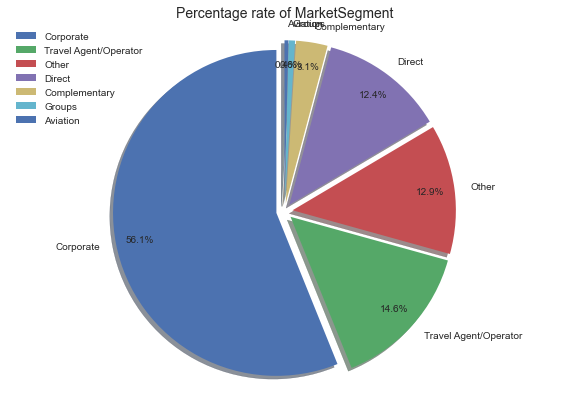

In [67]:
plt_1=plt.figure(figsize=(10,10))
explode = (0.05, 0.05,0.05,0.05, 0.05, 0.05,0.05)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage rate of MarketSegment',fontsize=14)
plt.legend()
plt.show()


In [68]:
# Pie chart
labels = list(d1['DistributionChannel'].unique())
sizes = list((d1['DistributionChannel'].value_counts(normalize=True)*100).values.round(2))



In [69]:
print(labels)
print(sizes)

['Corporate', 'Travel Agent/Operator', 'Direct', 'Electronic Distribution']
[82.07, 13.44, 3.72, 0.77]


<Figure size 720x720 with 0 Axes>

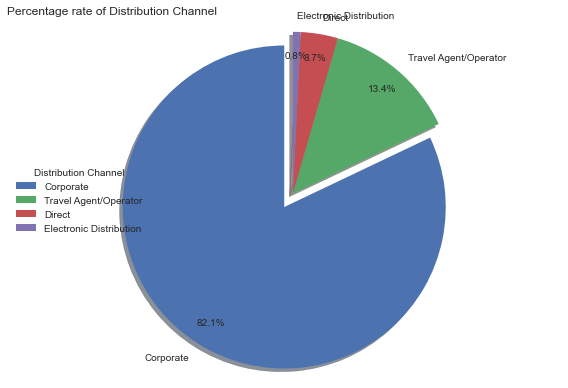

In [70]:
plt_1=plt.figure(figsize=(10,10))
explode = (0.1, 0,0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)
ax1.axis('equal') 
ax1.set_title('Percentage rate of Distribution Channel',loc='left')
plt.tight_layout()
#plt.subplots_adjust(bottom=0,top=0.9,right=1)
ax1.legend(loc='center left',title='Distribution Channel')
plt.show()


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

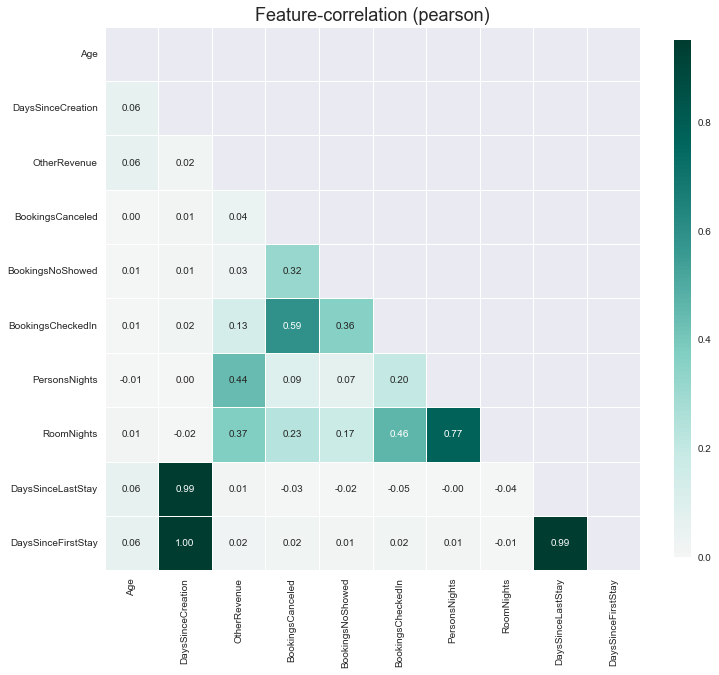

In [71]:
#outliers
klib.corr_plot(d1[['Age', 'DaysSinceCreation','OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay']],threshold=0.4) # Displaying  correlation

In [72]:
import numpy as np

In [73]:
num_data=d1.select_dtypes(include=np.number)

In [74]:
num_data


,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,month,year
0,1,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,8,2018
1,2,51.0,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,12,2015
3,4,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,12,2015
5,6,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,12,2015
7,8,32.0,1095,38,535.0,94.0,0,0,1,10,...,0,0,1,0,0,0,0,0,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83580,83581,48.0,0,20,176.0,147.0,0,0,1,4,...,0,0,0,0,0,0,0,0,12,2018
83582,83583,49.0,0,91,143.0,2.0,0,0,1,2,...,0,0,1,0,0,0,0,0,12,2018
83584,83585,52.0,0,116,336.9,105.5,0,0,1,8,...,0,0,0,0,0,0,0,0,12,2018
83586,83587,47.0,0,109,327.1,277.5,0,0,1,6,...,0,0,1,0,0,0,0,0,12,2018


In [75]:
d1.head()

,ID,Nationality,Age,DaysSinceCreation,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,month,year,Day
0,1,PRT,51.0,150,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,8,2018,Thursday
1,2,PRT,51.0,1095,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,12,2015,Sunday
3,4,FRA,60.0,1095,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,12,2015,Sunday
5,6,JPN,54.0,1095,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,...,0,0,0,0,0,0,0,12,2015,Wednesday
7,8,FRA,32.0,1095,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,...,0,1,0,0,0,0,0,12,2015,Sunday


In [76]:
#capping method:
for c in ['Age', 'DaysSinceCreation','OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed','LodgingRevenue','OtherRevenue',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay']:
    q1=np.quantile(d1[c],0.25)
    q3=np.quantile(d1[c],0.75)
    #print(q1,q3)
    iqr=q3-q1
    ll=q3+1.5*iqr
    ul=q1-1.5*iqr
    lb=np.quantile(d1[c],0.05)
    ub=np.quantile(d1[c],0.95)
    for i in d1[c].index:        
        if d1.loc[i,c] > ub:
            d1.loc[i,c] = ub
        if d1.loc[i,c] < lb:
            d1.loc[i,c] = lb

In [77]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63670 entries, 0 to 83588
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    63670 non-null  int64  
 1   Nationality           63670 non-null  object 
 2   Age                   63670 non-null  float64
 3   DaysSinceCreation     63670 non-null  int64  
 4   DocIDHash             63670 non-null  object 
 5   AverageLeadTime       63670 non-null  int64  
 6   LodgingRevenue        63670 non-null  float64
 7   OtherRevenue          63670 non-null  float64
 8   BookingsCanceled      63670 non-null  int64  
 9   BookingsNoShowed      63670 non-null  int64  
 10  BookingsCheckedIn     63670 non-null  int64  
 11  PersonsNights         63670 non-null  int64  
 12  RoomNights            63670 non-null  int64  
 13  DaysSinceLastStay     63670 non-null  int64  
 14  DaysSinceFirstStay    63670 non-null  int64  
 15  DistributionChannel

In [78]:
d1.to_csv(r'D:\Study Material\Sem 6\DMWA Project\Hotel Customer Segmentation\Unscaled_data.csv', index = False, header=True)

In [79]:
d1['Amenities']=d1[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']].sum(axis=1).astype(object)

In [80]:
d1['Amenities'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [81]:
# The guest had requested more than 1 amentities

In [82]:
d1.drop(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],axis=1,inplace=True) # dropping not relevant variables

In [83]:
d1['Nationality'].value_counts(ascending=False).head(50) # more than 50 countries have good amount of occurences

PRT    9572
FRA    9386
DEU    7897
GBR    6567
ESP    3939
ITA    2561
USA    2433
BEL    2329
NLD    2061
BRA    2023
CHE    1589
IRL    1489
AUT    1094
CAN     978
SWE     907
ISR     677
CHN     674
NOR     577
POL     567
AUS     523
DNK     468
FIN     447
RUS     414
ROU     370
HUN     233
JPN     215
CZE     193
GRC     182
LUX     177
AGO     152
TUR     151
ARG     150
KOR     143
IND     137
MAR     127
MEX     121
SRB     121
BGR     112
HRV     112
EST     100
NZL      70
DZA      65
MOZ      61
UKR      61
LVA      60
IRN      58
SVK      58
COL      55
CHL      54
TWN      53
Name: Nationality, dtype: int64

In [84]:
#converting Countries into continents
cont_code=pd.read_excel('code.xlsx')



In [85]:
d1['Nationality'] = d1['Nationality'].replace(['TMP'],'TLS')
d1=d1.merge(cont_code,how='left',on='Nationality')

In [86]:
d1

,ID,Nationality,Age,DaysSinceCreation,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,month,year,Day,Amenities,Continent
0,1,PRT,51.0,150,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,0,0,...,5,151,999,Corporate,Corporate,8,2018,Thursday,0,Europe
1,2,PRT,51.0,997,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,...,5,998,999,Travel Agent/Operator,Travel Agent/Operator,12,2015,Sunday,0,Europe
2,4,FRA,60.0,997,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,...,5,998,999,Travel Agent/Operator,Travel Agent/Operator,12,2015,Sunday,0,Europe
3,6,JPN,54.0,997,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,0,...,2,998,999,Travel Agent/Operator,Other,12,2015,Wednesday,0,Asia
4,8,FRA,32.0,997,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,0,...,5,998,999,Travel Agent/Operator,Other,12,2015,Sunday,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63665,83581,DEU,48.0,66,0x9A75BA8B885B4CCF562FEC991F4B34DDECE67D43DD04...,20,176.0,147.0,0,0,...,2,67,69,Travel Agent/Operator,Other,12,2018,Saturday,0,Europe
63666,83583,FRA,49.0,66,0x5672F95F21E93CDF0387BC40900503CA91352EA17B84...,91,143.0,6.0,0,0,...,1,67,69,Travel Agent/Operator,Other,12,2018,Sunday,1,Europe
63667,83585,ITA,52.0,66,0x7AE14552CC1ABDB74EED8F709E9ECDDA822F164C704F...,116,336.9,105.5,0,0,...,4,67,69,Travel Agent/Operator,Other,12,2018,Thursday,0,Europe
63668,83587,IRL,47.0,66,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,270.0,0,0,...,3,67,69,Travel Agent/Operator,Other,12,2018,Friday,1,Europe


In [87]:
d1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 63670 entries, 0 to 63669
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   63670 non-null  int64  
 1   Nationality          63670 non-null  object 
 2   Age                  63670 non-null  float64
 3   DaysSinceCreation    63670 non-null  int64  
 4   DocIDHash            63670 non-null  object 
 5   AverageLeadTime      63670 non-null  int64  
 6   LodgingRevenue       63670 non-null  float64
 7   OtherRevenue         63670 non-null  float64
 8   BookingsCanceled     63670 non-null  int64  
 9   BookingsNoShowed     63670 non-null  int64  
 10  BookingsCheckedIn    63670 non-null  int64  
 11  PersonsNights        63670 non-null  int64  
 12  RoomNights           63670 non-null  int64  
 13  DaysSinceLastStay    63670 non-null  int64  
 14  DaysSinceFirstStay   63670 non-null  int64  
 15  DistributionChannel  63670 non-null 

In [88]:
d1['PersonsNights'].value_counts()

6     13704
4     10418
2      9628
8      8249
1      4147
3      4018
14     3925
10     3468
12     3091
9      1845
5       904
7       221
11       33
13       19
Name: PersonsNights, dtype: int64

In [89]:
def persons(x):
    if x==0:
        return "0"
    elif x==1:
        return "1"
    elif x==2:
        return "2"
    elif x<=3 or x<=5:
        return "3 to 5"
    elif x<=6 or x<=10:
        return "6 to 10"
    elif x<=11 or x<=20:
        return "11 to 20"
    elif x<=21 or x<=30:
        return "21 to 30"
    else:
        return "30+"

In [90]:
d1["PersonsNights"]=d1["PersonsNights"].apply(persons)

In [91]:
d1["RoomNights"]=d1["RoomNights"].apply(persons)

In [92]:
d1["PersonsNights"]

0        6 to 10
1        6 to 10
2        6 to 10
3         3 to 5
4        6 to 10
          ...   
63665     3 to 5
63666          2
63667    6 to 10
63668    6 to 10
63669    6 to 10
Name: PersonsNights, Length: 63670, dtype: object

In [93]:
d1['PersonsNights'].unique()

array(['6 to 10', '3 to 5', '11 to 20', '1', '2'], dtype=object)

In [94]:
d1["PersonsNights"]

0        6 to 10
1        6 to 10
2        6 to 10
3         3 to 5
4        6 to 10
          ...   
63665     3 to 5
63666          2
63667    6 to 10
63668    6 to 10
63669    6 to 10
Name: PersonsNights, Length: 63670, dtype: object

In [95]:
d1['PersonsNights'].value_counts()

6 to 10     27487
3 to 5      15340
2            9628
11 to 20     7068
1            4147
Name: PersonsNights, dtype: int64

In [96]:
d1['RoomNights'].unique()

array(['3 to 5', '2', '6 to 10', '1'], dtype=object)

In [97]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63670 entries, 0 to 63669
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   63670 non-null  int64  
 1   Nationality          63670 non-null  object 
 2   Age                  63670 non-null  float64
 3   DaysSinceCreation    63670 non-null  int64  
 4   DocIDHash            63670 non-null  object 
 5   AverageLeadTime      63670 non-null  int64  
 6   LodgingRevenue       63670 non-null  float64
 7   OtherRevenue         63670 non-null  float64
 8   BookingsCanceled     63670 non-null  int64  
 9   BookingsNoShowed     63670 non-null  int64  
 10  BookingsCheckedIn    63670 non-null  int64  
 11  PersonsNights        63670 non-null  object 
 12  RoomNights           63670 non-null  object 
 13  DaysSinceLastStay    63670 non-null  int64  
 14  DaysSinceFirstStay   63670 non-null  int64  
 15  DistributionChannel  63670 non-null 

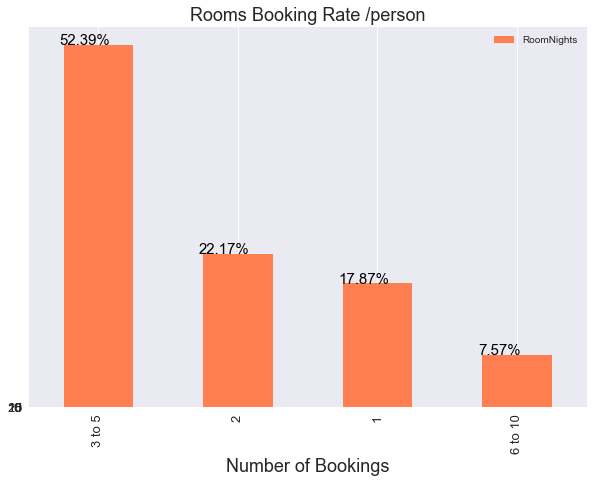

In [98]:
ax = d1['RoomNights'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title(" Rooms Booking Rate /person ", fontsize=18)
ax.set_xlabel("Number of Bookings", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])
ax.legend()
totals = []
for i in ax.patches:      
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

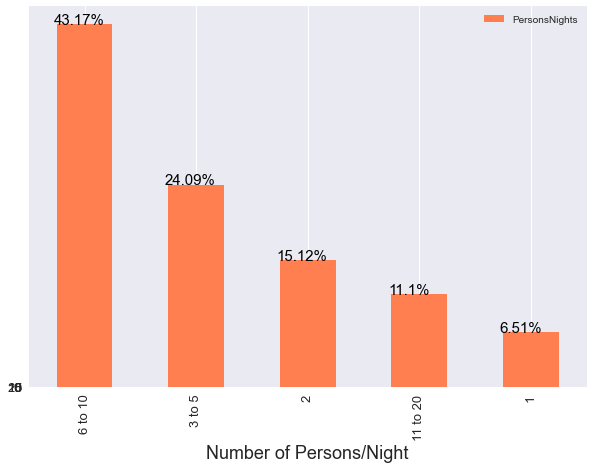

In [99]:
ax = d1['PersonsNights'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("", fontsize=18)
ax.set_xlabel("Number of Persons/Night", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])
ax.legend()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

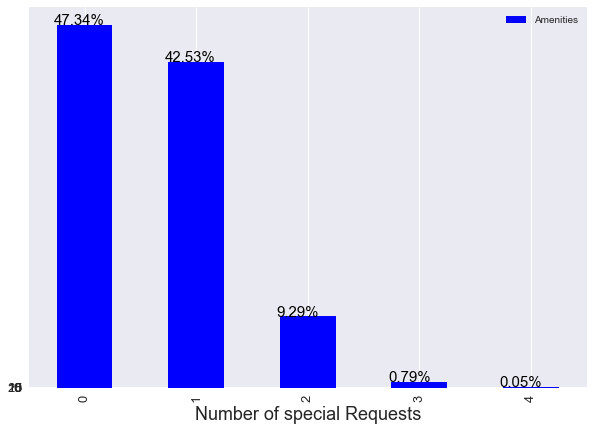

In [100]:
ax = d1['Amenities'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("", fontsize=18)
ax.set_xlabel("Number of special Requests", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])
ax.legend()
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
    

In [101]:
# Customers likely to book 1 booking with 3-5 rooms with 6-10 persons per Night

In [102]:
d['AverageLeadTime'].value_counts(ascending=False).head(20)

0     2793
1     1705
2     1057
6     1045
5     1018
4     1016
3      979
7      957
8      906
9      675
11     622
13     622
12     579
10     569
14     569
20     548
15     521
19     517
29     496
21     495
Name: AverageLeadTime, dtype: int64

In [103]:
# creating sample dataframe for hypothesis testing

In [104]:
sample=pd.concat([num_data,d1.select_dtypes(exclude=np.number)],axis=1) 

In [105]:
sample_df=sample.sample(frac=0.05)

In [106]:
print(sample_df['Age'].max(),sample_df['Age'].min())

72.0 24.0


In [107]:
def age_grp(x):
    if x>=20 and x<=30:
        return '20-30'
    elif x>=31 and x<=40:
        return '31-40'
    elif x>=41 and x<=50:
        return '41-50'
    elif x>=51 and x<=60:
        return '51-60'
    else:
        return '60+'


In [108]:
sample_df['Age_grp']=sample_df['Age'].apply(age_grp)

In [109]:
obs  = pd.crosstab(sample_df['Age_grp'],sample_df['Amenities'])
obs

Amenities,0,1,2,3
Age_grp,,,,
20-30,162,152,26,4
31-40,251,208,49,4
41-50,274,241,58,4
51-60,336,336,73,4
60+,500,423,82,6


In [110]:
obs  = pd.crosstab(sample_df['Continent'],sample_df['DistributionChannel'])
obs

DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
Continent,,,,
Africa,0,9,0,20
Asia,2,13,0,103
Europe,93,345,22,2243
North America,6,31,3,153
Oceania,0,3,0,21
South America,7,15,0,101


In [111]:
d1.to_csv(r'D:\Study Material\Sem 6\DMWA Project/Hotel Customer Segmentation/data_d1.csv', index = False, header=True)


In [112]:
#Encoding

In [113]:
d1.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'month', 'year', 'Day', 'Amenities', 'Continent'],
      dtype='object')

In [114]:
dummy=pd.get_dummies(d1[['DistributionChannel', 'MarketSegment','Continent']],drop_first=True)

In [115]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d1['BookingsCanceled']=le.fit_transform(d1['BookingsCanceled'])
d1['BookingsNoShowed']=le.fit_transform(d1['BookingsNoShowed'])  
d1['PersonsNights']=le.fit_transform(d1['PersonsNights'])
d1['RoomNights']=le.fit_transform(d1['RoomNights'])
d1['Amenities']=le.fit_transform(d1['Amenities'])

In [116]:
num_data=d1.select_dtypes(include=np.number)

In [117]:
data=pd.concat([num_data,dummy],axis=1)

In [118]:
data.var()[data.var()==0]

BookingsCanceled     0.0
BookingsNoShowed     0.0
BookingsCheckedIn    0.0
dtype: float64

In [119]:
data.drop(['BookingsCanceled','BookingsNoShowed','BookingsCheckedIn'],axis=1,inplace=True)

In [120]:
data.head()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,51.0,150,45,371.0,105.3,4,2,151,999,...,0,0,0,0,0,0,1,0,0,0
1,2,51.0,997,61,280.0,53.0,4,2,998,999,...,0,0,0,1,0,0,1,0,0,0
2,4,60.0,997,93,240.0,60.0,4,2,998,999,...,0,0,0,1,0,0,1,0,0,0
3,6,54.0,997,58,230.0,24.0,3,1,998,999,...,0,0,1,0,0,1,0,0,0,0
4,8,32.0,997,38,535.0,94.0,4,2,998,999,...,0,0,1,0,0,0,1,0,0,0


In [121]:
data.to_csv (r'D:/Study Material/Sem 6/DMWA Project/Hotel Customer Segmentation/Before_scaling_data.csv', index = False, header=True)


In [122]:
#Scaling:
from sklearn.preprocessing import StandardScaler 

X_scaler = StandardScaler()
for i in ['Age', 'DaysSinceCreation', 'AverageLeadTime','OtherRevenue','DaysSinceLastStay','DaysSinceFirstStay','LodgingRevenue']:
    data[i] = X_scaler.fit_transform(data[i].values.reshape(-1,1))


In [123]:
data.to_csv (r'D:/Study Material/Sem 6/DMWA Project/Hotel Customer Segmentation/processed_data.csv', index = False, header=True)
